# STEP 1 

In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def asciiDC3 (seq) : 
    asc=[]
    for i in seq : 
        asc.append(ord(i))
    
    return asc+[0,0,0]

In [3]:
def position1_2 (asc):
    ind1=[]
    ind2=[]
    for k in range(len(asc)-2):
        #attention on a peut etre fait de la merde ici, pas sure du -2
        if k%3==1 :
            ind1.append(k)
        if k%3==2:
            ind2.append(k)
    # dans le cas où T a un nombre d'élément multiple de 3, r12 ne contiendra pas le triplet [0,0,0].
    # Or, la fonction, "removesentinel" retire 1 élément notre suffix table, pour justement se débarrasser de [0,0,0]
    # J'ai donc décider de rajouter artificiellement [0,0,0] dans les cas où il n'est pas déjà là.
    if len(asc)%3==0:
        ind1.append(len(asc)-1-2)
        
    return ind1+ind2

99 98 97 0     0 0
0  1  2 3      4 5

p1= 1 [98 97 0]
p2= 2


In [4]:
print(len([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0])-3)

18


In [5]:
print(position1_2([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0]))

[1, 4, 7, 10, 13, 16, 18, 2, 5, 8, 11, 14, 17]


In [6]:
def radix (p, t):
    r=[]
    for i in range(len(p)):
        index=p[i]
        r.append([t[index],t[index+1], t[index+2]])
    return r

In [7]:
def radix_with_p12(p,t):
    r=[]
    for i in range(len(p)):
        index=p[i]
        r.append([[t[index],t[index+1], t[index+2]],index])
    return r

In [8]:
def sort_with_p12(array, alphabet, columnNumber):
    #print("array")
    #print(array)
    #print("alphabet")
    #print(alphabet)
    if len(array) == 0:
        return array

  # Perform counting sort on each column, starting at the last

    column = columnNumber
    while column>=0: # nous on met "tant que l'indice est supérieur à 3"
        array = countingSortByDigit_with_p12(array, alphabet, column)
        column-=1 #change de colonne dans ton tableau

    return array

def countingSortByDigit_with_p12(array, alphabet, column):
    """
    ici possibleNumbers= nombre de chiffres possibles. Nous n'avons que 4 nombres (0,97,98,99)
    """

    countIndex = -1
    count = [0] * len(alphabet)
    output = [None] * len(array)

  # Count frequencies
    for i in range(0, len(array)):
        #print("i "+str(i))
        #print("array[i] "+ str(array[i]))
        #print("column "+str(column))
        
        countIndex = alphabet[array[i][0][column]]
        count[countIndex] += 1

  # Compute cumulates
    for i in range(1, len(alphabet)):
        count[i] += count[i - 1]

  # Move records
    for i in range(len(array) - 1, -1, -1):
        countIndex = alphabet[array[i][0][column]]
        count[countIndex] -= 1
        output[count[countIndex]] = array[i]
       
    return output

In [9]:
def triplets_are_equal(a,b):
    for i in range(len(a)):
        if a[i]!=b[i]:
            return False
    return True


def ordre_with_p12(R12p12sorted, use_index_12=False):
    # nous renovie la liste order du genre (1,2,2,3,4,4,5)  et un booléen indiquant s'il y a répétition
    index=1
    repetition=False
    order=[1]
    
    if use_index_12:
        indexdict={R12p12sorted[0][1]:1}
        
    for i in range(1, len(R12p12sorted)): 
        if triplets_are_equal(R12p12sorted[i-1][0], R12p12sorted[i][0]):
            order.append(index)
            repetition=True
        else : 
            index+=1
            order.append(index)
            
        if use_index_12:
            indexdict[R12p12sorted[i][1]]=order[i]
    if use_index_12:
        return order, repetition, indexdict
    else: 
        return order
            

In [10]:
def alphabetT(T):
    ### à changer pcq c laid
    dic={}
    a=[]
    for i in range(len(T)):
        a.append(T[i])
    a.sort() ## MDR CE SORT EST A CHANGER SERGIO VA NOUS TUER
    
    for element in a:
        if not (element in dic):
            dic[element]=len(dic)
    return dic

In [11]:
def alphabetR0_with_p12(R0p0):
    ### à changer pcq c laid
    dic={}
    a=[]
    for column in range(2):
        for i in range(len(R0p0)):
            a.append(R0p0[i][0][column])
    a.sort() ## MDR CE SORT EST A CHANGER SERGIO VA NOUS TUER
    
    for element in a:
        if not (element in dic):
            dic[element]=len(dic)
    return dic

In [12]:
def Tprime_with_p12(p12, indexdict):
    t=[]
    for p in p12:
        t.append(indexdict[p])
    return t

In [109]:
def position0_R0_p0(T, index12dict):
    #attention T se finit avec trois 0
    #print("T")
    #print(T)
    position=[]
    R=[]
    for i in range(len(T)-3): #on ne prend pas en compte les trois 0 sentinelle
        if i%3==0:
            position.append(i)
            if i+1<len(T)-3:
                #print("i")
                #print(i)
                #print("T[i+1]")
                #print(T[i+1])
                R.append([[T[i],index12dict[i+1]],position[-1]])
            else:
                R.append([[T[i],1],position[-1]]) # car les sentinelles sont forcément les 1ères dans l'ordre alphabétique
    return position, R

In [112]:
def merge_with_p12(Tfinal, r0p0sorted, r12p12sorted, index12dict) : 
    print("Tfinal")
    print(Tfinal)
    print("r0p0sorted")
    print(r0p0sorted)
    print("r12p12sorted")
    print(r12p12sorted)
    
    liste=[]
    A=0
    B=0
    while A<len(r0p0sorted) and B<len(r12p12sorted):
        print("rentre dans le while")
        a=r0p0sorted[A][1]
        b=r12p12sorted[B][1]
        if Tfinal[a]!=Tfinal[b] :
            minimum=min(Tfinal[a], Tfinal[b])
            
            if minimum == Tfinal[a]:
                print("a= "+str(a)+", b= "+str(b)+", on append le "+str(a))
                A+=1
                liste.append(a)
            else: 
                print("a= "+str(a)+", b= "+str(b)+", on append le "+str(b))
                B+=1
                liste.append(b)

        else :
            if b%3==1 : 
                print(str(b)+" est congru à 1 modulo 3")
                longueur=len(liste)
                print("l'objet liste est pour l'instant constitué de: ")
                print(liste)
                i=0
                print("on compare les positions de "+str(a+1)+" et "+str(b+1))
                print("index12dict[" +str(a+1)+"]= ")
                print(index12dict[a+1])
                print("index12dict[" +str(b+1)+"]= ")
                print(index12dict[b+1])
                if index12dict[a+1]<index12dict[b+1]:
                    liste.append(a)
                    print("on append "+ str(a))
                    A+=1
                else:
                    liste.append(b)
                    print("on append "+ str(b))
                    B+=1
                    
                    
            elif b%3==2 :
                print(str(b)+"est congru à 2 modulo 3")
                if Tfinal[a+1]!=Tfinal[b+1] :
                    minimum=min(Tfinal[a], Tfinal[b])
                    if minimum == Tfinal[a]:
                        A+=1
                        liste.append(a)
                    else: 
                        B+=1
                        liste.append(b)

                else:
                    if index12dict[a+2]<index12dict[b+2]:
                        liste.append(a)
                        A+=1
                    else:
                        liste.append(b)
                        B+=1
                        
        print("plus dans la boucle while")
        print("A "+str(A))
        print("B "+str(B))
        if A==len(r0p0sorted):
            print("on concatène les index12")
            for i in range(B,len(r12p12sorted)):
                liste.append(r12p12sorted[i][1])
                
        if B==len(r12p12sorted):
            print("on concatène les index0")
            for i in range(A, len(r0p0sorted)):
                liste+=r0p0sorted[i][1]

    return liste

### test zone avec test 2

In [15]:
test_2='ATGCTAGCTGCCCTGATCTCTCTGA!'
p12_test_2=[1, 4, 7, 10, 13, 16, 19, 22, 25, 2, 5, 8, 11, 14, 17, 20, 23, 26]
r12_test_2=[[84, 71, 67], [84, 65, 71], [67, 84, 71], [67, 67, 67], [84, 71, 65], [84, 67, 84], [67, 84, 67], [84, 71, 65], [33, 0, 0], [71, 67, 84], [65, 71, 67], [84, 71, 67], [67, 67, 84], [71, 65, 84], [67, 84, 67], [84, 67, 84], [71, 65, 33], [0, 0, 0]]
alphabet_test_2={0: 0, 33: 1, 65: 2, 67: 3, 71: 4, 84: 5}


r12_p12_test_2=radix_with_p12(p12_test_2,asciiDC3(test_2))
print(r12_p12_test_2)



[[[84, 71, 67], 1], [[84, 65, 71], 4], [[67, 84, 71], 7], [[67, 67, 67], 10], [[84, 71, 65], 13], [[84, 67, 84], 16], [[67, 84, 67], 19], [[84, 71, 65], 22], [[33, 0, 0], 25], [[71, 67, 84], 2], [[65, 71, 67], 5], [[84, 71, 67], 8], [[67, 67, 84], 11], [[71, 65, 84], 14], [[67, 84, 67], 17], [[84, 67, 84], 20], [[71, 65, 33], 23], [[0, 0, 0], 26]]


In [16]:
r12_p12_sorted=sort_with_p12(r12_p12_test_2, alphabet_test_2, 2)
print(r12_p12_sorted)

[[[0, 0, 0], 26], [[33, 0, 0], 25], [[65, 71, 67], 5], [[67, 67, 67], 10], [[67, 67, 84], 11], [[67, 84, 67], 19], [[67, 84, 67], 17], [[67, 84, 71], 7], [[71, 65, 33], 23], [[71, 65, 84], 14], [[71, 67, 84], 2], [[84, 65, 71], 4], [[84, 67, 84], 16], [[84, 67, 84], 20], [[84, 71, 65], 13], [[84, 71, 65], 22], [[84, 71, 67], 1], [[84, 71, 67], 8]]


In [17]:
print(r12_p12_sorted[5][0])
print(r12_p12_sorted[6][0])
print(triplets_are_equal(r12_p12_sorted[5][0],r12_p12_sorted[6][0]))
ordre_test_2, repetition, indexdict_test_2=ordre_with_p12(r12_p12_sorted, True)
print(ordre_test_2)
print(indexdict_test_2)

[67, 84, 67]
[67, 84, 67]
True
[1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 12, 13, 13, 14, 14]
{26: 1, 25: 2, 5: 3, 10: 4, 11: 5, 19: 6, 17: 6, 7: 7, 23: 8, 14: 9, 2: 10, 4: 11, 16: 12, 20: 12, 13: 13, 22: 13, 1: 14, 8: 14}


In [18]:
p0, R0_p0_test_2=position0_R0_p0(asciiDC3(test_2), indexdict_test_2)

print(p0)
print(R0_p0_test_2)

alphabet_r0_test_2=alphabetR0_with_p12(R0_p0_test_2)
print(alphabet_r0_test_2)
    
r0p0sorted=sort_with_p12(R0_p0_test_2,alphabet_r0_test_2 ,1)
print(r0p0sorted)

order0=ordre_with_p12(r0p0sorted)
    

[0, 3, 6, 9, 12, 15, 18, 21, 24]
[[[65, 14], 0], [[67, 11], 3], [[71, 7], 6], [[71, 4], 9], [[67, 13], 12], [[65, 12], 15], [[84, 6], 18], [[67, 13], 21], [[65, 2], 24]]
{2: 0, 4: 1, 6: 2, 7: 3, 11: 4, 12: 5, 13: 6, 14: 7, 65: 8, 67: 9, 71: 10, 84: 11}
[[[65, 2], 24], [[65, 12], 15], [[65, 14], 0], [[67, 11], 3], [[67, 13], 12], [[67, 13], 21], [[71, 4], 9], [[71, 7], 6], [[84, 6], 18]]


### test zone avec abcabcabc

In [19]:
S="abcabcacab"
T=asciiDC3(S)
columnnumber=2
print(T)


[97, 98, 99, 97, 98, 99, 97, 99, 97, 98, 0, 0, 0]


In [20]:
p12=position1_2(T)
print(p12)
R12=radix_with_p12(p12, T)
print(R12)
alph=alphabetT(T)
alph
Rs12= sort_with_p12(R12, alph, columnnumber)
print(Rs12)

use_index12=True
order12, boolean, index12dict =ordre_with_p12(Rs12,use_index12)
print(order12)
print(boolean)
print(index12dict)

tprime=Tprime_with_p12(p12, index12dict)
print(tprime)

tprime=tprime+[0,0,0]
tprime

[1, 4, 7, 10, 2, 5, 8]
[[[98, 99, 97], 1], [[98, 99, 97], 4], [[99, 97, 98], 7], [[0, 0, 0], 10], [[99, 97, 98], 2], [[99, 97, 99], 5], [[97, 98, 0], 8]]
[[[0, 0, 0], 10], [[97, 98, 0], 8], [[98, 99, 97], 1], [[98, 99, 97], 4], [[99, 97, 98], 7], [[99, 97, 98], 2], [[99, 97, 99], 5]]
[1, 2, 3, 3, 4, 4, 5]
True
{10: 1, 8: 2, 1: 3, 4: 3, 7: 4, 2: 4, 5: 5}
[3, 3, 4, 1, 4, 5, 2]


[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]

In [21]:
p12prime=position1_2(tprime)
print(p12prime)
R12prime=radix_with_p12(p12prime, tprime)
print(R12prime)
alphprime=alphabetT(tprime)
print(alphprime)
Rs12prime= sort_with_p12(R12prime, alphprime, columnnumber)
print(Rs12prime)

order12prime, boolean, index12primedict =ordre_with_p12(Rs12prime, True)
print(order12prime)
print(boolean)
print(index12primedict)

[1, 4, 7, 2, 5]
[[[3, 4, 1], 1], [[4, 5, 2], 4], [[0, 0, 0], 7], [[4, 1, 4], 2], [[5, 2, 0], 5]]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
[[[0, 0, 0], 7], [[3, 4, 1], 1], [[4, 1, 4], 2], [[4, 5, 2], 4], [[5, 2, 0], 5]]
[1, 2, 3, 4, 5]
False
{7: 1, 1: 2, 2: 3, 4: 4, 5: 5}


In [22]:
p0prime, r0prime=position0_R0_p0(tprime, index12primedict)
print(p0prime)
print(r0prime)

[0, 3, 6]
[[[3, 2], 0], [[1, 4], 3], [[2, 1], 6]]


In [23]:
alph0prime=alphabetR0_with_p12(r0prime)
print(alph0prime)
r0sprime= sort_with_p12(r0prime, alph0prime, columnnumber-1)
print(r0sprime)

index120prime=merge_with_p12(tprime, r0sprime, Rs12prime, index12primedict)
index120prime

{1: 0, 2: 1, 3: 2, 4: 3}
[[[1, 4], 3], [[2, 1], 6], [[3, 2], 0]]


[7, 3, 6, 0, 1, 2, 4, 5]

In [24]:
def sort(array,index, alphabet, columnNumber):
    #print("array")
    #print(array)
    #print("alphabet")
    #print(alphabet)
    if len(array) == 0:
        return array

  # Perform counting sort on each column, starting at the last

    column = columnNumber
    while column>=0: # nous on met "tant que l'indice est supérieur à 3"
        array, index = countingSortByDigit(array,index, alphabet, column)
        column-=1 #change de colonne dans ton tableau

    return array, index

def countingSortByDigit(array, index, alphabet, column):
    """
    ici possibleNumbers= nombre de chiffres possibles. Nous n'avons que 4 nombres (0,97,98,99)
    """

    countIndex = -1
    count = [0] * len(alphabet)
    output = [None] * len(array)
    outputIndex= [0] * len(array)

  # Count frequencies
    for i in range(0, len(array)):
        #print("i "+str(i))
        #print("array[i] "+ str(array[i]))
        #print("column "+str(column))
        
        countIndex = alphabet[array[i][column]]
        count[countIndex] += 1

  # Compute cumulates
    for i in range(1, len(alphabet)):
        count[i] += count[i - 1]

  # Move records
    for i in range(len(array) - 1, -1, -1):
        countIndex = alphabet[array[i][column]]
        count[countIndex] -= 1
        output[count[countIndex]] = array[i]
        outputIndex[count[countIndex]]=index[i]
       
    return output, outputIndex

In [25]:
def ordre(R, index12, use_index_12=False):
    # nous renovie la liste order du genre (1,2,2,3,4,4,5)  et un booléen indiquant s'il y a répétition
    index=1
    repetition=False
    order=[1]
    
    if use_index_12:
        indexdict={index12[0]:1}
        
    for i in range(1, len(R)): 
        if R[i-1]==R[i] : 
            order.append(index)
            repetition=True
        else : 
            index+=1
            order.append(index)
            
        if use_index_12:
            indexdict[index12[i]]=i+1
    if use_index_12:
        return order, repetition, indexdict
    else: 
        return order, repetition
            

In [26]:
def Tprime(ordre, p12, indexdict):
    t=[]
    for p in p12:
        t.append(ordre[indexdict[p]-1])
    return t

In [27]:
def alphabetT(T):
    ### à changer pcq c laid
    dic={}
    a=[]
    for i in range(len(T)):
        a.append(T[i])
    a.sort() ## MDR CE SORT EST A CHANGER SERGIO VA NOUS TUER
    
    for element in a:
        if not (element in dic):
            dic[element]=len(dic)
    return dic

In [28]:
def alphabetR0(R0):
    ### à changer pcq c laid
    dic={}
    a=[]
    for column in range(2):
        for i in range(len(R0)):
            a.append(R0[i][column])
    a.sort() ## MDR CE SORT EST A CHANGER SERGIO VA NOUS TUER
    
    for element in a:
        if not (element in dic):
            dic[element]=len(dic)
    return dic

## Testons nos fonctions sur un string simple

In [29]:
S="abcabcacab"
T=asciiDC3(S)
columnnumber=2
print(T)


[97, 98, 99, 97, 98, 99, 97, 99, 97, 98, 0, 0, 0]


In [30]:
p12=position1_2(T)
print(p12)

[1, 4, 7, 10, 2, 5, 8]


In [31]:
R12=radix(p12, T)
print(R12)

[[98, 99, 97], [98, 99, 97], [99, 97, 98], [0, 0, 0], [99, 97, 98], [99, 97, 99], [97, 98, 0]]


In [32]:
alph=alphabetT(T)
alph

{0: 0, 97: 1, 98: 2, 99: 3}

In [33]:
Rs12, index12= sort(R12,p12, alph, columnnumber)
print(Rs12)
print(index12)

[[0, 0, 0], [97, 98, 0], [98, 99, 97], [98, 99, 97], [99, 97, 98], [99, 97, 98], [99, 97, 99]]
[10, 8, 1, 4, 7, 2, 5]


In [34]:
use_index12=True
order12, boolean, index12dict =ordre(Rs12, index12,use_index12)
print(order12)
print(boolean)
print(index12dict)

[1, 2, 3, 3, 4, 4, 5]
True
{10: 1, 8: 2, 1: 3, 4: 4, 7: 5, 2: 6, 5: 7}


In [35]:
alph =alphabetT(T)
alph

{0: 0, 97: 1, 98: 2, 99: 3}

In [36]:
tprime=Tprime(order12, p12, index12dict)
print(tprime)

[3, 3, 4, 1, 4, 5, 2]


In [37]:
tprime=tprime+[0,0,0]
tprime

[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]

### On répète les opérations jusqu'à avoir aucun charactère répété dans T⁽n⁾

In [38]:
p12prime=position1_2(tprime)
print(p12prime)
R12prime=radix(p12prime, tprime)
print(R12prime)
alphprime=alphabetT(tprime)
print(alphprime)
Rs12prime, index12prime= sort(R12prime,p12prime, alphprime, columnnumber)
print(Rs12prime)
print(index12prime)
order12prime, boolean, index12primedict =ordre(Rs12prime, index12prime, True)
print(order12prime)
print(boolean)
print(index12primedict)

[1, 4, 7, 2, 5]
[[3, 4, 1], [4, 5, 2], [0, 0, 0], [4, 1, 4], [5, 2, 0]]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
[[0, 0, 0], [3, 4, 1], [4, 1, 4], [4, 5, 2], [5, 2, 0]]
[7, 1, 2, 4, 5]
[1, 2, 3, 4, 5]
False
{7: 1, 1: 2, 2: 3, 4: 4, 5: 5}


# STEP 2 

In [39]:
import copy

In [40]:
def position0_R0(T, index12dict):
    #attention T se finit avec trois 0
    position=[]
    R=[]
    for i in range(len(T)-3): #on ne prend pas en compte les trois 0 sentinelle
        if i%3==0:
            position.append(i)
            if i+1<len(T)-3:
                R.append([T[i],index12dict[i+1]])
            else:
                R.append([T[i],1]) # car les sentinelles sont forcément les 1ères dans l'ordre alphabétique
    return position, R

# Testons notre fonction avec le string T

In [41]:
print(index12prime)
print(index12primedict)
print(tprime)

[7, 1, 2, 4, 5]
{7: 1, 1: 2, 2: 3, 4: 4, 5: 5}
[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]


In [42]:
p0prime, r0prime=position0_R0(tprime, index12primedict)
print(p0prime)
print(r0prime)

[0, 3, 6]
[[3, 2], [1, 4], [2, 1]]


# STEP 3

In [43]:
def merge(Tfinal, index_0, index12, index12dict) : 
    liste=[]
    A=0
    B=0
    while A<len(index_0) and B<len(index12):
        #print("rentre dans le while")
        a=index_0[A]
        b=index12[B]
        if Tfinal[a]!=Tfinal[b] :
            minimum=min(Tfinal[a], Tfinal[b])
            
            if minimum == Tfinal[a]:
                #print("a= "+str(a)+", b= "+str(b)+", on append le "+str(a))
                A+=1
                liste.append(a)
            else: 
                #print("a= "+str(a)+", b= "+str(b)+", on append le "+str(b))
                B+=1
                liste.append(b)

        else :
            if b%3==1 : 
                #print(str(b)+" est congru à 1 modulo 3")
                longueur=len(liste)
                i=0
                if index12dict[a+1]<index12dict[b+1]:
                    liste.append(a)
                    A+=1
                else:
                    liste.append(b)
                    B+=1
                    
                    
            elif b%3==2 :
                #print(str(b)+"est congru à 2 modulo 3")
                if Tfinal[a+1]!=Tfinal[b+1] :
                    minimum=min(Tfinal[a], Tfinal[b])
                    if minimum == Tfinal[a]:
                        A+=1
                        liste.append(a)
                    else: 
                        B+=1
                        liste.append(b)

                else:
                    if index12dict[a+2]<index12dict[b+2]:
                        liste.append(a)
                        A+=1
                    else:
                        liste.append(b)
                        B+=1
                        

        #print("A "+str(A))
        #print("B "+str(B))
        if A==len(index_0):
            liste+=index12[B:]
                
        if B==len(index12):
            liste+=index_0[A:]

    return liste

In [44]:
def removesentinel(index):
    return index[1:]

In [45]:
def resumeHigherOrder(index012prime, P12):
    output=[]
    for element in index012prime:
        output.append(P12[element])
        
    return output

### Testons notre fonction avec le string T

In [46]:
alph0prime=alphabetR0(r0prime)
print(alph0prime)

{1: 0, 2: 1, 3: 2, 4: 3}


In [47]:
r0sprime, index0prime= sort(r0prime,p0prime, alph0prime, columnnumber-1)
print(r0sprime)
print(index0prime)

[[1, 4], [2, 1], [3, 2]]
[3, 6, 0]


In [48]:
print(tprime)
print(index0prime)
print(index12prime)

[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]
[3, 6, 0]
[7, 1, 2, 4, 5]


In [49]:
index120prime=merge(tprime, index0prime, index12prime, index12primedict)
index120prime

[7, 3, 6, 0, 1, 2, 4, 5]

# Assemblage final

In [50]:
def almost_dc3_with_p12(T):
    # T est une liste de int

    
    columnNumber=2
    p12=position1_2(T)
    

    r12=radix_with_p12(p12,T)


    alphabet_T=alphabetT(T)
    
    
    r12sorted=sort_with_p12(r12, alphabet_T, columnNumber)
    
    use_index_12=True
    order12,repetition, index12dict=ordre_with_p12(r12sorted, use_index_12)

    

    if repetition:

        
        Tprim=Tprime_with_p12(p12, index12dict)+[0,0,0]

        index012=almost_dc3_with_p12(Tprim)


        index12=resumeHigherOrder(index012, p12)


    p0,r0p0=position0_R0_p0(T, index12dict)

    alphabet_r0=alphabetR0_with_p12(r0p0)

    
    r0p0sorted=sort_with_p12(r0p0,alphabet_r0 ,columnNumber-1)


    #order0=ordre(r0sorted, index12)
    

    index012=removesentinel(merge_with_p12(T, r0p0sorted, r12sorted, index12dict))


    return index012
   
    
    

In [111]:
def almost_dc3_with_p12_debugg(T):
    # T est une liste de int

    
    columnNumber=2
    p12=position1_2(T)
    
    print("p12")
    print(p12)
    print("taille de p12 avant récursion")
    print(len(p12))
    print("\n")
    
    r12=radix_with_p12(p12,T)
    print("r12")
    print(r12)
    print("\n")

    alphabet_T=alphabetT(T)
    print("alphabet de T")
    print(alphabet_T)
    
    r12sorted=sort_with_p12(r12, alphabet_T, columnNumber)
    print("r12sorted")
    print(r12sorted)
    print("\n")
    
    order12,repetition, index12dict=ordre_with_p12(r12sorted, True)
    print("order12")
    print(order12)
    print("index12dict")
    print(index12dict)
    print("entre-t-on dans la boucle de répétition?")
    print(repetition)
    print("\n")
    

    if repetition:

        
        Tprim=Tprime_with_p12(p12, index12dict)+[0,0,0]
        print("tprime")
        print(Tprim)
        print("taille de tprime")
        print(len(Tprim))
        print("\n")
        
        index012=almost_dc3_with_p12_debugg(Tprim)
        print("index012")
        print(index012)
        print("taille de index012")
        print(len(index012))
        print("\n")

        index12=resumeHigherOrder(index012, p12)
        print("resume higher order index12")
        print(index12)
        print("taille de index12 après retour à taille initiale")
        print(len(index12))
        print("\n")

    p0,r0p0=position0_R0_p0(T, index12dict)
    print("rappel de T")
    print(T)
    print("r0p0")
    print(r0p0)
    print("taille de r0p0")
    print(len(r0p0))
    print("\n")

    alphabet_r0=alphabetR0_with_p12(r0p0)
    print("alphabet_r0")
    print(alphabet_r0)
    print("\n")
    
    r0sorted=sort_with_p12(r0p0,alphabet_r0 ,columnNumber-1)
    print("r0sorted")
    print(r0sorted)
    print("taille de r0sorted")
    print(len(r0sorted))
    print("\n")

    #order0=ordre(r0sorted, index12)
    
    temp=merge_with_p12(T, r0sorted, r12sorted, index12dict)
    print("taille de temp")
    print(len(temp))
    
    index012=removesentinel(merge_with_p12(T, r0sorted, r12sorted, index12dict))
    print("taille après la fonction removesentinel")
    print(len(index012))
    print("rappel de T")
    print(T)
    print("index012")
    print(index012)
    print("\n")

    return index012
   
    
    

In [52]:
def almost_dc3(T):
    # T est une liste de int

    
    columnNumber=2
    p12=position1_2(T)
    

    r12=radix(p12,T)


    alphabet_T=alphabetT(T)
    
    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)
    
    use_index_12=True
    order12,repetition, index12dict=ordre(r12sorted, index12, use_index_12)

    

    if repetition:

        
        Tprim=Tprime(order12, p12, index12dict)+[0,0,0]

        index012=almost_dc3(Tprim)


        index12=resumeHigherOrder(index012, p12)


    p0,r0=position0_R0(T, index12dict)

    alphabet_r0=alphabetR0(r0)

    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)


    #order0=ordre(r0sorted, index12)
    

    index012=removesentinel(merge(T, index0, index12, index12dict))


    return index012
   
    
    

In [53]:
def almost_dc3_debugg(T):
    # T est une liste de int

    
    columnNumber=2
    p12=position1_2(T)
    
    print("p12")
    print(p12)
    print("taille de p12 avant récursion")
    print(len(p12))
    print("\n")
    
    r12=radix(p12,T)
    print("r12")
    print(r12)
    print("\n")

    alphabet_T=alphabetT(T)
    print("alphabet de T")
    print(alphabet_T)
    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)
    print("r12sorted")
    print(r12sorted)
    print("index12")
    print(index12)
    print("taille de index12 avant récursion")
    print(len(index12))
    print("\n")
    
    order12,repetition, index12dict=ordre(r12sorted,index12, True)
    print("order12")
    print(order12)
    print("index12dict")
    print(index12dict)
    print("entre-t-on dans la boucle de répétition?")
    print(repetition)
    print("\n")
    

    if repetition:

        
        Tprim=Tprime(order12, p12, index12dict)+[0,0,0]
        print("tprime")
        print(Tprim)
        print("taille de tprime")
        print(len(Tprim))
        print("\n")
        
        index012=almost_dc3(Tprim)
        print("index012")
        print(index012)
        print("taille de index012")
        print(len(index012))
        print("\n")

        index12=resumeHigherOrder(index012, p12)
        print("resume higher order index12")
        print(index12)
        print("taille de index12 après retour à taille initiale")
        print(len(index12))
        print("\n")

    p0,r0=position0_R0(T, index12dict)
    print("p0")
    print(p0)
    print("taille de p0")
    print(len(p0))
    print("\n")
    
    print("r0")
    print(r0)
    print("\n")
    alphabet_r0=alphabetR0(r0)

    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)
    print("index0")
    print(index0)
    print("taille de index0")
    print(len(index0))
    print("\n")

    #order0=ordre(r0sorted, index12)
    
    temp=merge(T, index0, index12, index12dict)
    print("taille de temp")
    print(len(temp))
    
    index012=removesentinel(merge(T, index0, index12,index12dict))
    print("taille après la fonction removesentinel")
    print(len(index012))
    print("index012")
    print(index012)
    print("\n")

    return index012
   
    
    

### Testons notre fonction avec le string T

In [54]:
almost_dc3(T)

[8, 0, 3, 6, 9, 1, 4, 7, 2, 5]

In [55]:
almost_dc3_with_p12(T)

[8, 0, 3, 6, 9, 1, 4, 7, 2, 5]

## Test avec biopython 


In [56]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
from Bio import SeqIO
genome=[]
nucleotide_genome=0
for seq_record in SeqIO.parse("/home/azarkua/Documents/2023-2024/omiques2/developement/omique2/genome.fna", "fasta"):
    genome.append(seq_record)
    nucleotide_genome+=len(seq_record.seq)
print(genome[13:])

[SeqRecord(seq=Seq('tgaaccctaaaccctaaaccctaaaccctaaacccctaaaccctaaaccctgaa...gtt'), id='NC_037283.1', name='NC_037283.1', description='NC_037283.1 Plasmodium falciparum 3D7 genome assembly, chromosome: 14', dbxrefs=[]), SeqRecord(seq=Seq('ATGATAAAATTTTTAAAACCTAAAATAAAAATATTAAAAAAATTAAATATACCT...ATT'), id='NC_036769.1', name='NC_036769.1', description='NC_036769.1 Plasmodium falciparum strain 3D7, apicoplast', dbxrefs=[])]


In [58]:
reads=[]
nucleotide_reads=0
for seq_record in SeqIO.parse("/home/azarkua/Documents/2023-2024/omiques2/developement/omique2/reads.fq", "fastq"):
    reads.append(seq_record)
    nucleotide_reads+=len(seq_record.seq)
    #if len(seq_record.seq)!= 100:
    #    print("False")
print(reads[:1])

[SeqRecord(seq=Seq('TTTCCTTTTTAAGCGTTTTATTTTTTAATAAAAAAAATATAGTATTATATAGTA...TAA'), id='NC_004325.2-100000', name='NC_004325.2-100000', description='NC_004325.2-100000', dbxrefs=[])]


In [59]:
temp=genome[1].seq.upper()
print(len(temp)//4)
temp[50:60]

236775


Seq('CCCTGAACCC')

Pour l'instant, notre code met environ 2min d'attente pour faire la suffix table de 25 000 nucléotides.

In [60]:
T=asciiDC3(temp)
#print(T)

In [61]:
suffix_array=almost_dc3(T)
print(suffix_array[:100])
#print(timemeasuring)

[947101, 129, 939, 5790, 5997, 6315, 6540, 6642, 6666, 6669, 6714, 6774, 6927, 6960, 7116, 7203, 7404, 7617, 7650, 7695, 7758, 7893, 8019, 8046, 8382, 8547, 8823, 8835, 8913, 8946, 8991, 9105, 9234, 19266, 22410, 22440, 22605, 22863, 23121, 23124, 23151, 23154, 23157, 23160, 23163, 23166, 23169, 23172, 23193, 23202, 23220, 23223, 23229, 23232, 23235, 23238, 23241, 23244, 23247, 23250, 23268, 23271, 23274, 23295, 23298, 23322, 23325, 23328, 23352, 23370, 23373, 23391, 23394, 23457, 23964, 23994, 24231, 24405, 24408, 24420, 24606, 24609, 24612, 24777, 24786, 24789, 24852, 24927, 25314, 25332, 25368, 25542, 25548, 25806, 25839, 25842, 25845, 25851, 25854, 25872]


## Mesurer le temps que prend notre fonction

In [62]:
import pstats
import cProfile

In [63]:
cProfile.run("almost_dc3(T)", "dc3_stats")
p = pstats.Stats("dc3_stats")
p.sort_stats("cumulative").print_stats()

Thu Nov  2 11:57:38 2023    dc3_stats

         31139851 function calls (31139846 primitive calls) in 22.435 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   22.435   22.435 {built-in method builtins.exec}
        1    0.228    0.228   22.435   22.435 <string>:1(<module>)
      6/1    0.719    0.120   22.206   22.206 /tmp/ipykernel_54973/891363277.py:1(almost_dc3)
       12    0.185    0.015    7.407    0.617 /tmp/ipykernel_54973/1511205218.py:1(sort)
       30    7.221    0.241    7.221    0.241 /tmp/ipykernel_54973/1511205218.py:18(countingSortByDigit)
        6    3.233    0.539    4.156    0.693 /tmp/ipykernel_54973/3410804580.py:1(merge)
        6    3.414    0.569    3.499    0.583 /tmp/ipykernel_54973/17099699.py:1(radix)
        6    1.135    0.189    1.216    0.203 /tmp/ipykernel_54973/1085424926.py:1(ordre)
        6    0.972    0.162    1.097    0.183 /tmp/ipykernel_54973/937691433.

### Idées d'optimisation  
-réussir à ne plus faire appel aux fonctions "alphabet"  

### BWT à l'aide de notre suffix table

In [64]:
def BWT_suffix_table(T,end_of_string="$"):
    """
    Compute the BWT from the suffix table
    
    Args:
        T (str): string
        end_of_string (char): end of string character to append
    
    Return:
        bwt (str): BWT
    """
    T += end_of_string
    suffix_array=almost_dc3(asciiDC3(T)) 
    bwt = ""
    for i in suffix_array:
        bwt += T[i-1]
    return(bwt)

In [65]:
def run_length_encoding(S):
    """
    Encode sequence using the Run Length method
    
    Args:
        text (str): string to be shifted
    
    Return:
        str: run length
    """
    encoded_S= ""
    i=0
    number=1
    while i<len(S):
        encoded_S+=S[i]
        i+=1
        while i<len(S) and S[i-1]==S[i]:
            number+=1
            i+=1
        if number>1:
            encoded_S+=str(number)
        number=1
    return encoded_S

#### Testons notre fonction

In [66]:
test = "ACATACAGATG"
suffix_array=almost_dc3(asciiDC3(test)) 
print(suffix_array)
print(BWT_suffix_table(test))

[4, 0, 6, 2, 8, 5, 1, 10, 7, 3, 9]
GT$CCGAATAAA


In [113]:
test_2='ATGCTAGCTGCCCTGATCTCTCTGA!'
suffix_array_2_with_p12=almost_dc3_with_p12_debugg(asciiDC3(test_2)) 
suffix_array_2=almost_dc3(asciiDC3(test_2)) 
print(suffix_array_2)
print(suffix_array_2_with_p12)


p12
[1, 4, 7, 10, 13, 16, 19, 22, 25, 2, 5, 8, 11, 14, 17, 20, 23, 26]
taille de p12 avant récursion
18


r12
[[[84, 71, 67], 1], [[84, 65, 71], 4], [[67, 84, 71], 7], [[67, 67, 67], 10], [[84, 71, 65], 13], [[84, 67, 84], 16], [[67, 84, 67], 19], [[84, 71, 65], 22], [[33, 0, 0], 25], [[71, 67, 84], 2], [[65, 71, 67], 5], [[84, 71, 67], 8], [[67, 67, 84], 11], [[71, 65, 84], 14], [[67, 84, 67], 17], [[84, 67, 84], 20], [[71, 65, 33], 23], [[0, 0, 0], 26]]


alphabet de T
{0: 0, 33: 1, 65: 2, 67: 3, 71: 4, 84: 5}
r12sorted
[[[0, 0, 0], 26], [[33, 0, 0], 25], [[65, 71, 67], 5], [[67, 67, 67], 10], [[67, 67, 84], 11], [[67, 84, 67], 19], [[67, 84, 67], 17], [[67, 84, 71], 7], [[71, 65, 33], 23], [[71, 65, 84], 14], [[71, 67, 84], 2], [[84, 65, 71], 4], [[84, 67, 84], 16], [[84, 67, 84], 20], [[84, 71, 65], 13], [[84, 71, 65], 22], [[84, 71, 67], 1], [[84, 71, 67], 8]]


order12
[1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 12, 13, 13, 14, 14]
index12dict
{26: 1, 25: 2, 5: 3, 10: 4, 11: 5, 19

In [68]:
for i in range(len(suffix_array_2_with_p12)):
    print(test_2[suffix_array_2_with_p12[i]:],test_2[suffix_array_2[i]:]==test_2[suffix_array_2_with_p12[i]:])
  

! True
A! True
ATCTCTCTGA! True
ATGCTAGCTGCCCTGATCTCTCTGA! True
AGCTGCCCTGATCTCTCTGA! True
CCCTGATCTCTCTGA! True
CTAGCTGCCCTGATCTCTCTGA! True
CTGATCTCTCTGA! True
CTGA! True
CCTGATCTCTCTGA! True
CTCTGA! True
CTCTCTGA! True
CTGCCCTGATCTCTCTGA! True
GCCCTGATCTCTCTGA! True
GCTGCCCTGATCTCTCTGA! True
GA! True
GATCTCTCTGA! True
GCTAGCTGCCCTGATCTCTCTGA! True
TAGCTGCCCTGATCTCTCTGA! True
TCTCTCTGA! False
TCTCTGA! False
TCTGA! False
TGATCTCTCTGA! False
TGA! False
TGCTAGCTGCCCTGATCTCTCTGA! True
TGCCCTGATCTCTCTGA! True


In [69]:
test_2='ATGCTAGCTGCCCTGATCTCTCTGA!'
print(len(asciiDC3(test_2))%3==0)
print(len(test_2))
print(len(asciiDC3(test_2)))

False
26
29


In [70]:
print(ord("G"))

71


In [71]:
test_2='ATGCTAGCTGCCCTGATCTCTCTGA!'
almost_dc3_debugg(asciiDC3(test_2))

p12
[1, 4, 7, 10, 13, 16, 19, 22, 25, 2, 5, 8, 11, 14, 17, 20, 23, 26]
taille de p12 avant récursion
18


r12
[[84, 71, 67], [84, 65, 71], [67, 84, 71], [67, 67, 67], [84, 71, 65], [84, 67, 84], [67, 84, 67], [84, 71, 65], [33, 0, 0], [71, 67, 84], [65, 71, 67], [84, 71, 67], [67, 67, 84], [71, 65, 84], [67, 84, 67], [84, 67, 84], [71, 65, 33], [0, 0, 0]]


alphabet de T
{0: 0, 33: 1, 65: 2, 67: 3, 71: 4, 84: 5}
r12sorted
[[0, 0, 0], [33, 0, 0], [65, 71, 67], [67, 67, 67], [67, 67, 84], [67, 84, 67], [67, 84, 67], [67, 84, 71], [71, 65, 33], [71, 65, 84], [71, 67, 84], [84, 65, 71], [84, 67, 84], [84, 67, 84], [84, 71, 65], [84, 71, 65], [84, 71, 67], [84, 71, 67]]
index12
[26, 25, 5, 10, 11, 19, 17, 7, 23, 14, 2, 4, 16, 20, 13, 22, 1, 8]
taille de index12 avant récursion
18


order12
[1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 12, 13, 13, 14, 14]
index12dict
{26: 1, 25: 2, 5: 3, 10: 4, 11: 5, 19: 6, 17: 7, 7: 8, 23: 9, 14: 10, 2: 11, 4: 12, 16: 13, 20: 14, 13: 15, 22: 16, 1: 17, 8: 18}

[25,
 24,
 15,
 0,
 5,
 10,
 3,
 12,
 21,
 11,
 19,
 17,
 7,
 9,
 6,
 23,
 14,
 2,
 4,
 18,
 20,
 16,
 22,
 13,
 1,
 8]

In [72]:
print(BWT_suffix_table(test_2))

A!GG$TGGCTCTTGTATTTCCACCCCA


In [73]:
print(run_length_encoding(BWT_suffix_table(test)))

GT$C2GA2TA3


BWT sur notre génome

In [74]:
bwt_T=BWT_suffix_table(genome[1].seq.upper(),end_of_string="$")
print(run_length_encoding(bwt_T)[:100])

ACT2C2ACA4C2AC2AC2ACGA2TGAT3C2ATA2T3ACA9TAGA10TA5TATATACTA6T2ATA2C2ATGA3GATA12GCA3G2A3TATCATA2CA2GTA


Mesurons le temps que l'opération prend

In [75]:
cProfile.run("run_length_encoding(BWT_suffix_table(genome[1].seq.upper(),end_of_string='$'))", "bwt_stats")
p = pstats.Stats("bwt_stats")
p.sort_stats("cumulative").print_stats()

Thu Nov  2 11:58:18 2023    bwt_stats

         41158502 function calls (41158497 primitive calls) in 23.120 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   23.120   23.120 {built-in method builtins.exec}
        1    0.032    0.032   23.120   23.120 <string>:1(<module>)
        1    0.555    0.555   22.626   22.626 /tmp/ipykernel_54973/548353753.py:1(BWT_suffix_table)
      6/1    0.721    0.120   20.364   20.364 /tmp/ipykernel_54973/891363277.py:1(almost_dc3)
       12    0.188    0.016    7.608    0.634 /tmp/ipykernel_54973/1511205218.py:1(sort)
       30    7.420    0.247    7.420    0.247 /tmp/ipykernel_54973/1511205218.py:18(countingSortByDigit)
        6    3.247    0.541    4.204    0.701 /tmp/ipykernel_54973/3410804580.py:1(merge)
   947103    0.370    0.000    1.433    0.000 /home/azarkua/.local/lib/python3.10/site-packages/Bio/Seq.py:470(__getitem__)
        6    1.164    0.194    

## String search with BWT

version du prof

In [76]:
from collections import Counter

In [77]:
def last2first(counts,k,X):
    return k + sum([counts[char] for char in counts if char < X])
    
def get_first_occurrence(L,X):
    for i,l in enumerate(L):
        if l == X:
            return(i)
        
def occurrence_indexer(S):
    K = []
    last_index = {}
    for s in S:
        if s not in last_index: 
            last_index[s] = 0
        K.append(last_index[s])
        last_index[s] += 1
    return(K)
    
    
def pattern_matching_BWT(S,pattern):
    """
    Search a patter in a String using the BWT
    
    Args:
        S (str): string
        pattern (str): pattern
    
    Return:
        bool: true if the pattern is in the string    
    """
    L = BWT_suffix_table(S)
    K = occurrence_indexer(L)
    counts = Counter(L)
    e = 0
    f = len(L)
    i = len(pattern) - 1
    while e < f and i >= 0:
        X = pattern[i]
        first_occurence_in_L_ef = get_first_occurrence(L[e:f],X)
        if first_occurence_in_L_ef is None:
            return False
        else:
            r = first_occurence_in_L_ef+e

        last_occurence_in_L_ef = get_first_occurrence(L[e:f][::-1],X)
        if last_occurence_in_L_ef is None:
            return False
        else:
            s = f-last_occurence_in_L_ef-1


        
        
        e = last2first(counts,K[r],X)
        f = last2first(counts,K[s],X)+1
        i -= 1

    
    return(i<0)


In [78]:
def last2first(counts,k,X):
    return k + sum([counts[char] for char in counts if char < X])
    
def get_first_occurrence(L,X):
    for i,l in enumerate(L):
        if l == X:
            return(i)
        
def occurrence_indexer(S):
    K = []
    last_index = {}
    for s in S:
        if s not in last_index: 
            last_index[s] = 0
        K.append(last_index[s])
        last_index[s] += 1
    return(K)
    
    
def pattern_matching_BWT_debugg(S,pattern):
    """
    Search a patter in a String using the BWT
    
    Args:
        S (str): string
        pattern (str): pattern
    
    Return:
        bool: true if the pattern is in the string    
    """
    L = BWT_suffix_table(S)
    K = occurrence_indexer(L)
    counts = Counter(L)
    e = 0
    f = len(L)
    i = len(pattern) - 1
    while e < f and i >= 0:
        X = pattern[i]
        first_occurence_in_L_ef = get_first_occurrence(L[e:f],X)
        if first_occurence_in_L_ef is None:
            return False
        else:
            r = first_occurence_in_L_ef+e
        print("first_occurence_in_L_ef")
        print(first_occurence_in_L_ef)
        print("L[e:f]")
        print(L[e:f])
        print("r")
        print(r)
        print("X")
        print(X)
        print("L[r]")
        print(L[r])
        
        last_occurence_in_L_ef = get_first_occurrence(L[e:f][::-1],X)
        if last_occurence_in_L_ef is None:
            return False
        else:
            s = f-last_occurence_in_L_ef-1
        print("last_occurence_in_L_ef")
        print(last_occurence_in_L_ef)
        print("L[e:f]")
        print(L[e:f])
        print("s")
        print(s)
        print("X")
        print(X)
        print("L[s]")
        print(L[s])
        
        
        
        e = last2first(counts,K[r],X)
        f = last2first(counts,K[s],X)+1
        i -= 1
        
        print("r")
        print(r)
        print("s")
        print(s)
        print("e")
        print(e)
        print("f")
        print(f)
    
    return(i<0)


ma version

In [79]:
def localisation_count(bwt):
    """ renvoie un tableau T tel que T[i] renvoie combien de fois bwt[i] est apparu dans bwt[:i]
    """
    localisation=[0 for i in range(len(bwt))]
    count=[0 for i in range(5)]
    for i in range(len(bwt)):
        if bwt[i]=='$':
            count[0]+=1
            localisation[i]=count[0]
            
        elif bwt[i]=='A':
            count[1]+=1
            localisation[i]=count[1]
            
        elif bwt[i]=='C':
            count[2]+=1
            localisation[i]=count[2]
            
        elif bwt[i]=='G':
            count[3]+=1
            localisation[i]=count[3]
            
        elif bwt[i]=='T':
            count[4]+=1
            localisation[i]=count[4]
            
    return localisation, count

def left_corresponding_letter(letter, alphabet, bwt, count, localisation, bwt_index):
        occurence=localisation[bwt_index]
        #find the position i in the first column
        position=sum(count[:alphabet[letter]])+occurence
        #find the letter on position i in the last column
        letter=bwt[position-1]
        return letter, position-1
    
def pattern_matching_BWT_moi(S,pattern):
    """
    Search a patter in a String using the BWT
    
    Args:
        S (str): string
        pattern (str): pattern
    
    Return:
        bool: true if the pattern is in the string    
    """
    pattern_in_S = False
    bwt=BWT_suffix_table(S)
    print("bwt")
    print(bwt)
    localisation, count= localisation_count(bwt)
    
    i=len(pattern)-1 #position de la dernière lettre du pattern
    alphabet={'$':0, 'A':1,'C':2,'G':3, 'T':4}
    la=[]
    lb=[]
    
    
    letter=pattern[i]
    # initialisation des "lettres intéressantes"
    for j in range(len(bwt)):
        if bwt[j]==letter:
            la.append(j)
            #print("la initialisation")
            #print(la)
    while i!=0:
        letter=pattern[i]
        #print("on est à la lettre "+str(i)+ " du pattern, qui est "+ str(letter))
        i-=1
        k=0
        #print("les positions des lettres interessantes sont: ")
        #print(la)
        # on cherche les élèments qui correspondent à la lettre suivante de notre pattern
        for k in range(len(la)):
            index=la[k]
            right_letter=letter
            letter, position=left_corresponding_letter(right_letter, alphabet, bwt, count, localisation, index)
            
            if letter==pattern[i]:
                lb.append(position)
                #print("la lettre suivante (qui est "+ str(letter)+") est à la position "+ str(position))
    
            if not lb:
                #print("aucune lettre du texte ne correspond à la lettre suivante")
                return pattern_in_S
        la=lb
        lb=[]
                
        #on vérifie que la liste n'est pas vide
        
    
    pattern_in_S=True
    
    return pattern_in_S, la

#### Testons notre fonction

In [80]:
test

'ACATACAGATG'

In [81]:
pattern_matching_BWT(test,'CATAC')

True

In [82]:
localisation_count(BWT_suffix_table(test))

([1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 4, 5], [1, 5, 2, 2, 2])

In [83]:
Counter(BWT_suffix_table(test))

Counter({'G': 2, 'T': 2, '$': 1, 'C': 2, 'A': 5})

In [84]:
pattern_matching_BWT_moi(test,'CATAC')

bwt
GT$CCGAATAAA


(True, [4])

In [85]:
pattern_matching_BWT(test,'CATAC')

True

In [86]:
pattern=genome[1].seq.upper()[:10]
pattern

Seq('AACCCTAAAC')

In [87]:
genome[1].seq.upper()

Seq('AACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCTAAACCCT...TCA')

In [88]:
pattern_matching_BWT('ATGCTAGCTGCCCTGATCTCTCTGA','GCTAGC')

False

In [89]:
cProfile.run("pattern_matching_BWT(genome[1].seq.upper(),pattern)", "pattern_matching_stats")
p = pstats.Stats("pattern_matching_stats")
p.sort_stats("cumulative").print_stats()

Thu Nov  2 11:58:44 2023    pattern_matching_stats

         40609714 function calls (40609708 primitive calls) in 25.612 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   25.612   25.612 {built-in method builtins.exec}
        1    0.010    0.010   25.612   25.612 <string>:1(<module>)
        1    0.029    0.029   25.602   25.602 /tmp/ipykernel_54973/3682101168.py:20(pattern_matching_BWT)
        1    0.548    0.548   25.281   25.281 /tmp/ipykernel_54973/548353753.py:1(BWT_suffix_table)
      6/1    0.818    0.136   23.029   23.029 /tmp/ipykernel_54973/891363277.py:1(almost_dc3)
       12    0.202    0.017    8.083    0.674 /tmp/ipykernel_54973/1511205218.py:1(sort)
       30    7.881    0.263    7.881    0.263 /tmp/ipykernel_54973/1511205218.py:18(countingSortByDigit)
        6    3.282    0.547    4.224    0.704 /tmp/ipykernel_54973/3410804580.py:1(merge)
        6    3.077    0.513    3.160

In [90]:
pattern_matching_BWT_moi(test,'CATAC')

bwt
GT$CCGAATAAA


(True, [4])

### Première tentative de mesure du temps que prend dc3 (qui ne marche pas)

Mais j'y ai investi trop de temps pour le supprimer

i assume that when a function ends, an other function begins

In [91]:
      #time variables
t0=[] #starting times of every recursion of almost_dc3
timep12=[] 
timer12=[]
timealphabet=[]
timesort=[]
timeorder=[]
trep=[]
timeTprime=[]
tBeforeHigherOrder=[]
timeresumeHigherOrder=[]
tBeforeP0=[]
timeposition0_R0=[]
timealphabetR0=[]
    
timelist=[t0,timep12,timer12,timealphabet,timesort,timeorder,trep,timeTprime,tBeforeHigherOrder,timeresumeHigherOrder,tBeforeP0,timeposition0_R0,timealphabetR0]


In [92]:
def almost_dc3_time_measuring(T):
    
    t0.append(time.time())
    # T est une liste de int
    columnNumber=2
    p12=position1_2(T)
    
    print("p12")
    print(p12)
    print("taille de p12 avant récursion")
    print(len(p12))
    
    timep12.append(time.time()-t0[-1])
    
    r12=radix(p12,T)
    timer12.append(time.time()-timep12[-1])
    
    alphabet_T=alphabetT(T)
    timealphabet.append(time.time()-timer12[-1])
    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)
    timesort.append(time.time()-timealphabet[-1])
    
    order12,repetition=ordre(r12sorted)
    timeorder.append(time.time()-timesort[-1])
    
    if repetition:
        trep.append(time.time())
        
        Tprim=Tprime(order12, p12, index12)+[0,0,0]
        timeTprime.append(time.time()-trep[-1])
        
        index012=almost_dc3(Tprim)
        
        tBeforeHigherOrder.append(time.time())
        index12=resumeHigherOrder(index012, p12)
        timeresumeHigherOrder.append(time.time()-tBeforeHigherOrder[-1])
    
    print("taille de p12 après récursion")
    print(len(p12))
    
    tBeforeP0.append(time.time())
    p0,r0=position0_R0(T, index12)
    timeposition0_R0.append(time.time()-tBeforeP0[-1])
    
    alphabet_r0=alphabetR0(r0)
    timealphabetR0.append(time.time()-timeposition0_R0[-1])
    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)
    #i dont measure time here
    
    order0=ordre(r0sorted)
    #i dont measure time here
    
    index012=removesentinel(merge(T, index0, index12))
    #i dont measure time here

    return index012, timelist
   
    
    

In [93]:
length_repeating_loop=len(timeTprime)
timeTprime+=[0*i for i in range(len(t0)-length_repeating_loop)]
timeresumeHigherOrder+=[0*i for i in range(len(t0)-length_repeating_loop)]

In [94]:
time_measuring=pd.DataFrame({'p12':timep12, 
                             'r12':timer12, 
                             'alphabet':timealphabet, 
                             'sort':timesort, 
                             'order':timeorder, 
                             'Tprime':timeTprime, 
                             'HigherOrder':timeresumeHigherOrder, 
                             'P0':timeposition0_R0, 
                             'alphabetRO':timealphabetR0})

In [95]:
time_measuring

,p12,r12,alphabet,sort,order,Tprime,HigherOrder,P0,alphabetRO


In [96]:
time_measuring_melted = pd.melt(time_measuring)

<AxesSubplot:>

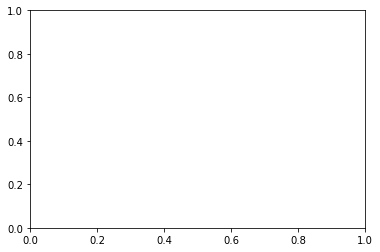

In [97]:
sns.boxplot(x='variable', y='value', data=time_measuring_melted)